In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fandango = pd.read_csv('fandango_scrape.csv')

In [3]:
# Task - 1 A
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [4]:
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.8+ KB


In [5]:
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [6]:
# Task - 1 B -> Relationship between VOTES and RATINGS

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

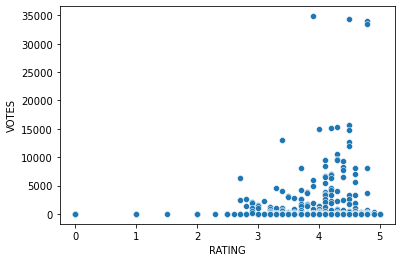

In [7]:
sns.scatterplot(data=fandango,y='VOTES',x='RATING')

<AxesSubplot:xlabel='RATING', ylabel='VOTES'>

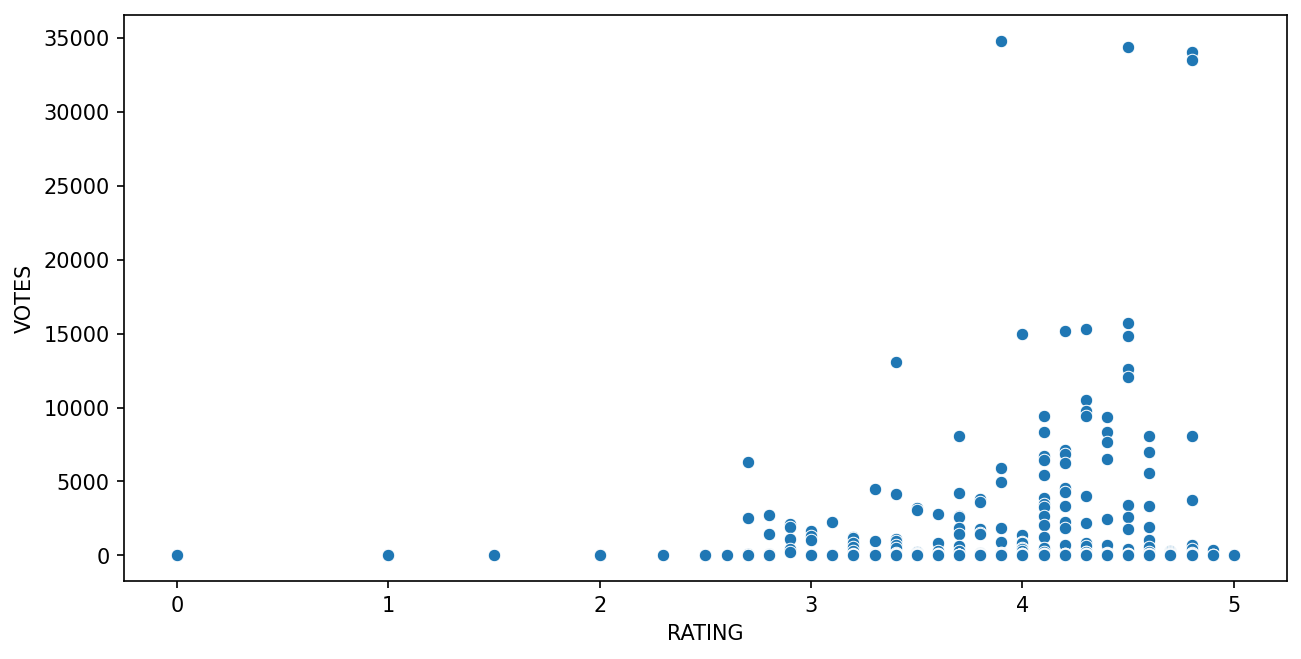

In [8]:
plt.figure(figsize=(10,5),dpi=150)
sns.scatterplot(data=fandango,y='VOTES',x='RATING')

In [9]:
# Task - 1 C -> Calculating the correlation between the columns

In [10]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [11]:
# Task - 1 D -> Assuming that every row in the film title column has the same format:
#    Film Title Name (Year)
# Create a new column that is able to strip the year from the title strings and set this new
# column as YEAR

In [12]:
title = 'Film Title Name (Year)'

In [13]:
title.split('(')[-1].replace(')','')

'Year'

In [14]:
fandango['YEAR'] = fandango['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [15]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [16]:
# Task - 1 E -> How many movies are in the Fandango DataFrame per year

In [17]:
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

In [18]:
# Task - 1 F -> Visualize the count of movies per year with a plot

<AxesSubplot:xlabel='YEAR', ylabel='count'>

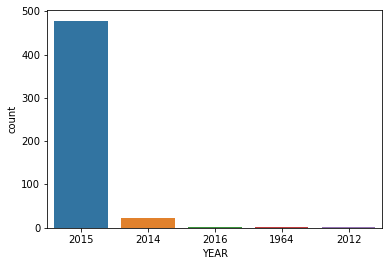

In [19]:
sns.countplot(data=fandango,x='YEAR')

In [20]:
# Task - 1 G -> Waht are the 10 movies with the highest number of votes?

In [21]:
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [22]:
# Task - 1 H -> How many have 0 votes

In [23]:
fandango['VOTES'] == 0

0      False
1      False
2      False
3      False
4      False
       ...  
499     True
500     True
501     True
502     True
503     True
Name: VOTES, Length: 504, dtype: bool

In [24]:
no_votes = fandango['VOTES'] == 0

In [25]:
no_votes.sum()

69

In [26]:
# Task 1 I -> Create D.F of only reviewed films by removing any films that have zero votes

In [27]:
fan_reviewed = fandango[fandango['VOTES']>0]

In [28]:
# Task 1 J -> Create a KDE plot that displays the distribution of ratings that
# are displayed(STARS) versus what the true rating was from votes(RATING).
# Clip the KDEs to 0-5.

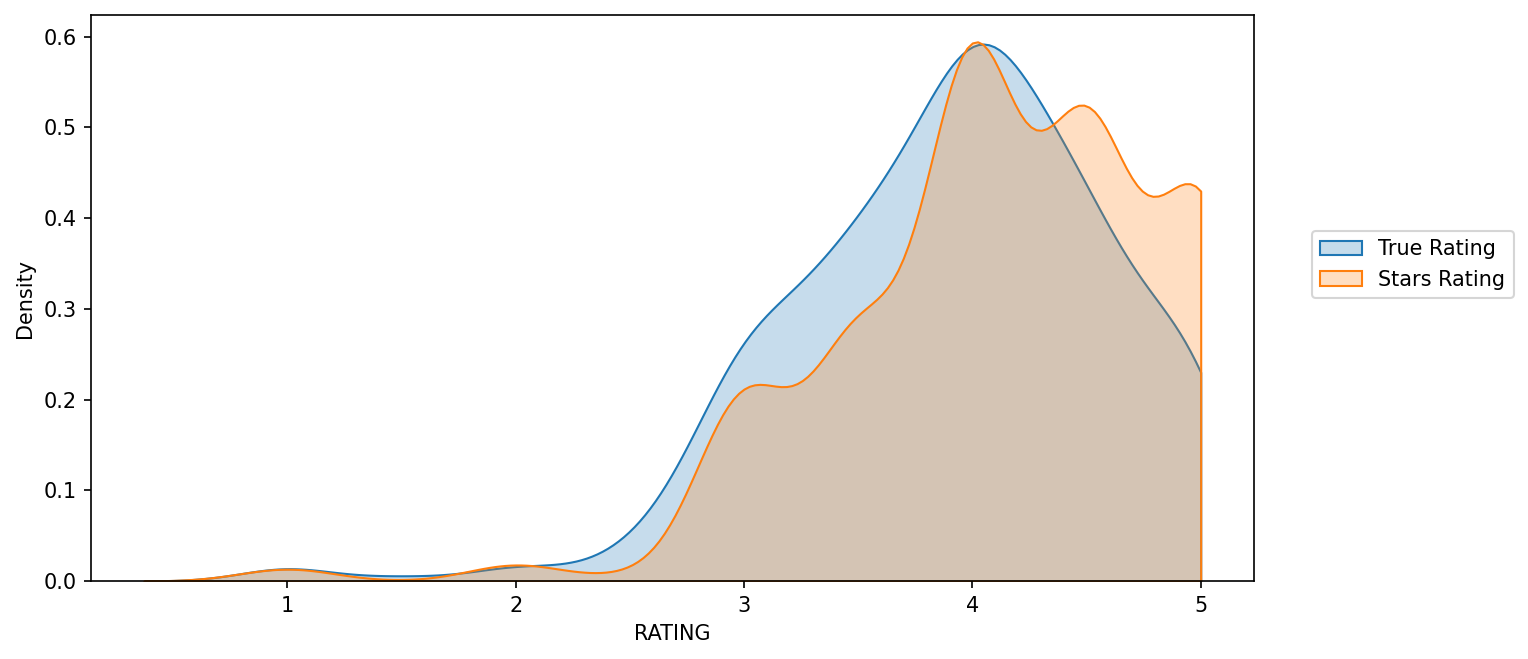

In [29]:
plt.figure(figsize=(10,5),dpi=150)

sns.kdeplot(data=fan_reviewed,x='RATING',clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewed,x='STARS',clip=[0,5],fill=True,label='Stars Rating')

plt.legend(loc=(1.05,0.5))

In [30]:
# Task 1 K -> Create a new column of the difference between STARS displayed versus true RATING.
# Calculate this difference wit STARS-RATINGS and round these differences to the nearest decimal point

In [31]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS']-fan_reviewed['RATING']

C:\Users\HP\AppData\Local\Temp/ipykernel_13624/3431589214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS']-fan_reviewed['RATING']


In [32]:
fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)

C:\Users\HP\AppData\Local\Temp/ipykernel_13624/1229596765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewed['STARS_DIFF'] = fan_reviewed['STARS_DIFF'].round(2)


In [33]:
fan_reviewed

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


In [34]:
 # Task 1 L -> Create a countplot to display the number of times a certain difference occurs

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

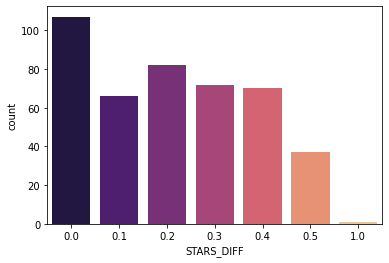

In [35]:
sns.countplot(data=fan_reviewed,x='STARS_DIFF',palette='magma')

In [36]:
# Task 1 M -> We can see from the plot above that one movie was displaying over a 1 star difference than its true rating!
# What movie had this close to 1 star differential?

In [37]:
fan_reviewed[fan_reviewed['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


# TASK 2 : Comparing Fandango Ratings to other Sites 

In [38]:
# Task 2 A -> Read in the "all_sites_scores.csv" file

In [39]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [40]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [41]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 8.6+ KB


In [42]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


In [43]:
# Task 2 B -> Create a scatterplot exploring the relationship between RT Critic reviewes and RT User reviews.

<AxesSubplot:xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

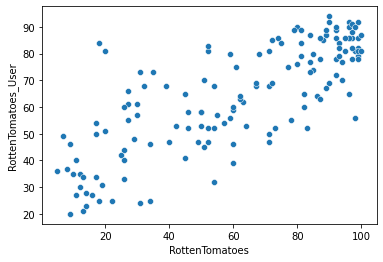

In [44]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')

(0.0, 100.0)

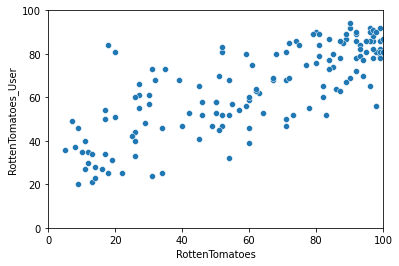

In [45]:
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

In [46]:
# Task 2 C -> Create a new column based off the difference b/w critics ratings and users
# ratings for Rotten Tomatoes. Calculate this with Rotten Tomatoes-Rotten Tomatoes_User

In [47]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes']-all_sites['RottenTomatoes_User']

In [48]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

In [49]:
# Task 2 D -> Plot the distribution b/w RT Critics Score and RT User Score.
# There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

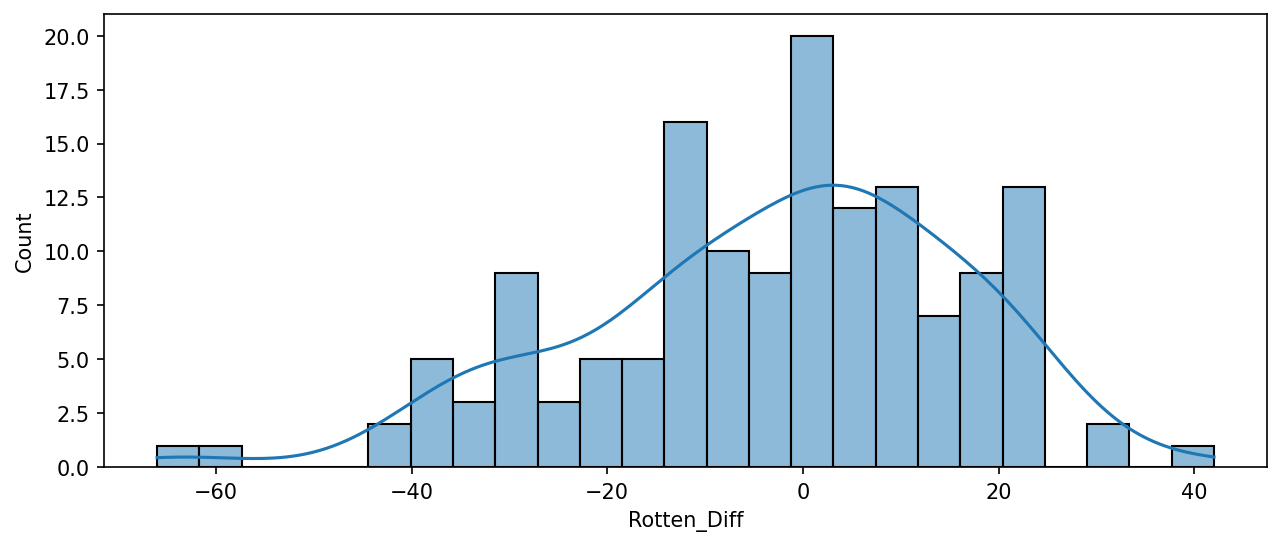

In [50]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)

<AxesSubplot:xlabel='Rotten_Diff', ylabel='Count'>

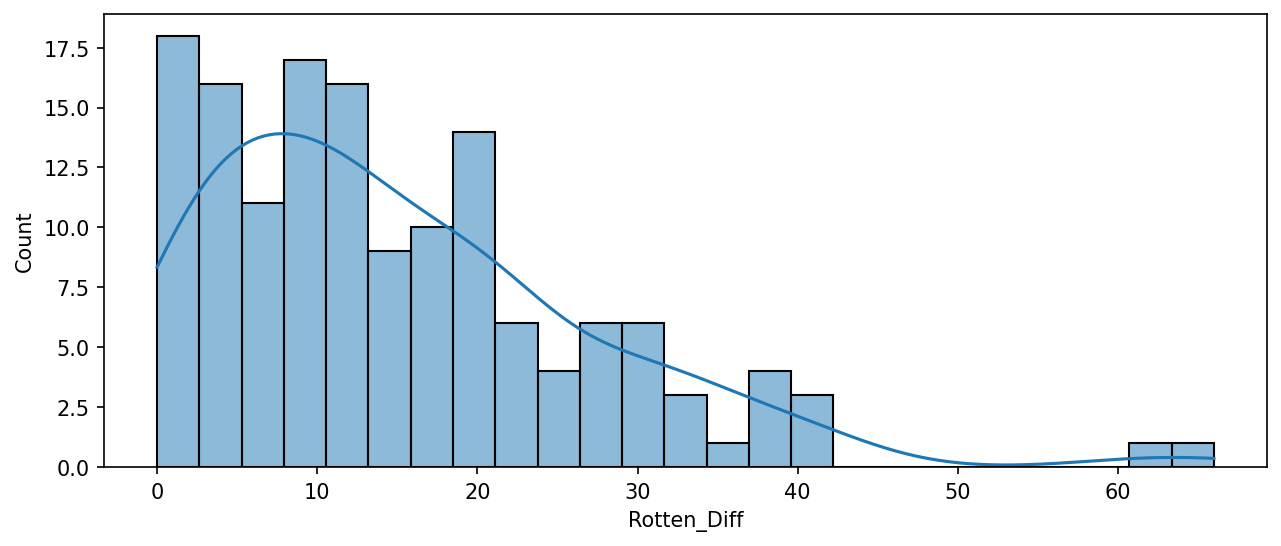

In [51]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x=all_sites['Rotten_Diff'].apply(abs),kde=True,bins=25)

In [52]:
# Task 2 D -> What are the top 5 movies users rated higher than the critics on average

In [53]:
all_sites.nsmallest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [54]:
# Task 2 E -> What are the top 5 movies users rated lesser than the critics on average

In [55]:
all_sites.nlargest(5,'Rotten_Diff')[['FILM','Rotten_Diff']]

,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


In [56]:
# Task 2 F -> Display a scatterplot of the Metacritic Rating versus the Metacritic User rating

(0.0, 100.0)

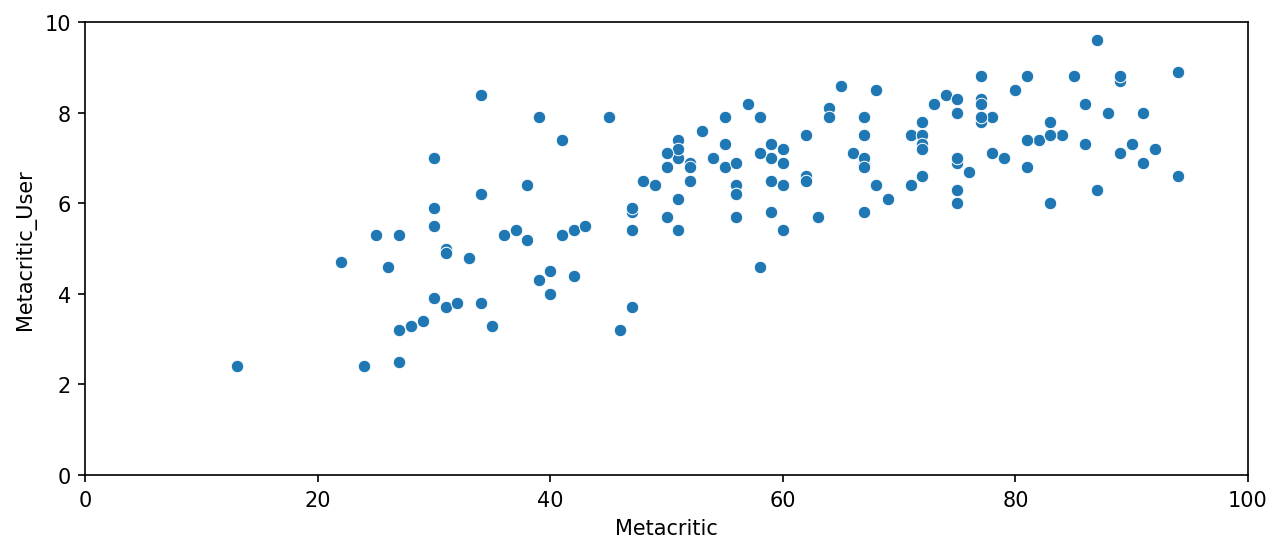

In [57]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

In [58]:
# Task 2 G -> Display a scatterplot of the vote counts on MetaCritic versus the vote count on IMDB

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

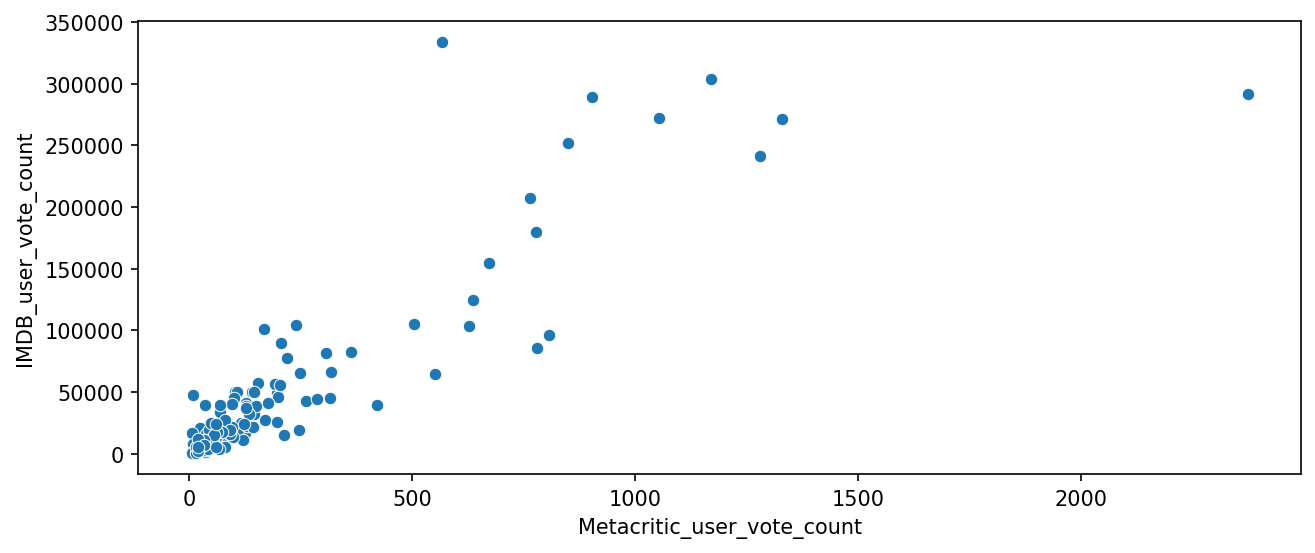

In [59]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

In [60]:
# Task 2 H -> What movie has the highest IMDB user vote count ?

In [61]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [62]:
# Task 2 I -> What movie has the highest Metacritic User Vote count ?

In [63]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# Task 3 : Fandango Score vs All Sites

In [64]:
# Task 3 A -> Combine the Fandango table with all the sites table. Not every movie in the Fandango table is in the all sites table,
# since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames,
# so do an inner merge to merge together both DataFrames based on the FILM columns. 

In [65]:
df = pd.merge(fandango,all_sites,on='FILM',how='inner')

In [66]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [68]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


In [69]:
# Task 3 B -> Normalize columns to Fandango STARS and RATINGS 0-5
# :-> Create new normalization columns for all ratings so they match up within the 0-5 star
# range show on Fandango. There are many ways to do this.

In [70]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [71]:
df['RT_Norm'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_Norm'] = np.round(df['RottenTomatoes_User']/20,1)

In [72]:
df['Meta_Norm'] = np.round(df['Metacritic']/20,1)
df['Meta_U_Norm'] = np.round(df['Metacritic_User']/2,1)

In [73]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [74]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


In [75]:
# Task 3 C -> Now create a norm_scores DataFrame that only contains the normalizes ratings.
# Include both STARS and RATING from the original Fandango table.

In [76]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm'],
      dtype='object')

In [77]:
norm_scores = df[['STARS', 'RATING','RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [78]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


In [79]:
# Task 3 D -> Comparing Distribution of Scores Across Sites
# Create a plot comparing the distribution of normalized rating across all sites.
# There are many ways to do this, but explore the Seaborn KDE plot docs for some simple
# ways to quickly show this. Don't worry if your plot format does not look exactly the same
# as ours, as long as the differences in distribution are clear.

<AxesSubplot:ylabel='Density'>

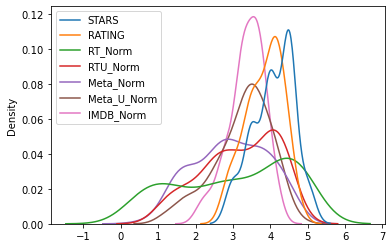

In [80]:
sns.kdeplot(data=norm_scores)

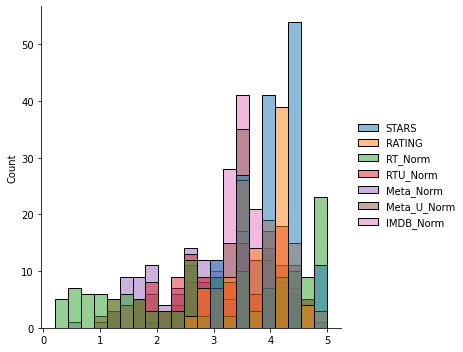

In [81]:
sns.displot(data=norm_scores)

<AxesSubplot:ylabel='Density'>

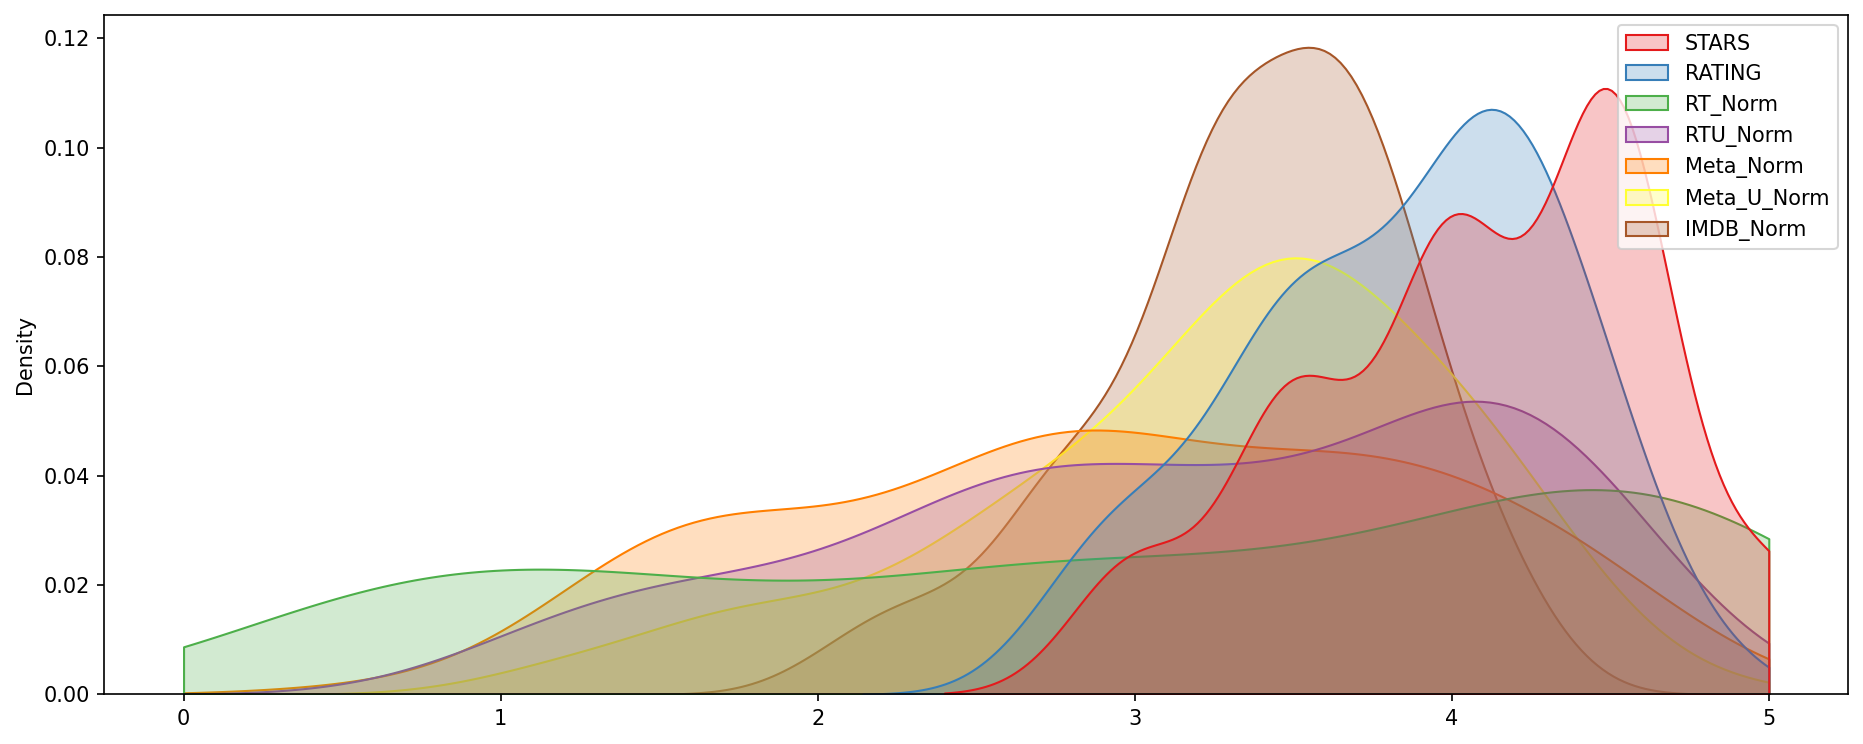

In [82]:
plt.figure(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')

In [83]:
# Since, there are some issues in moving legend in KDE plot

In [84]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

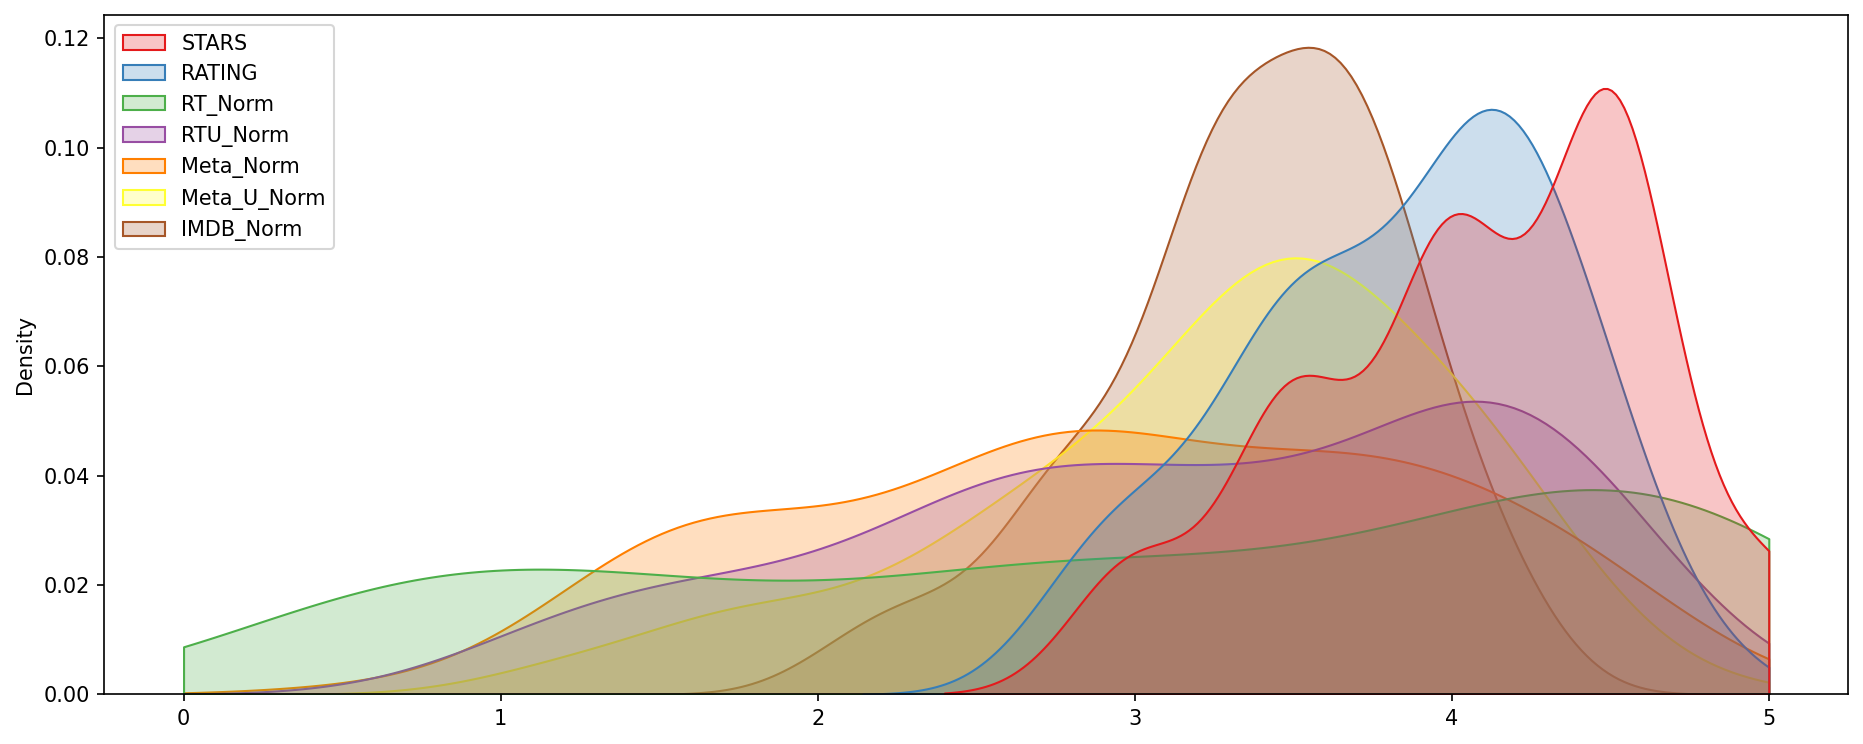

In [85]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores,clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")

## Result :
### Clearly Fandango has uneven distribution. We can also see that RT critics have the most uniformed distribution.

In [86]:
# Task 3 E -> Creating a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango

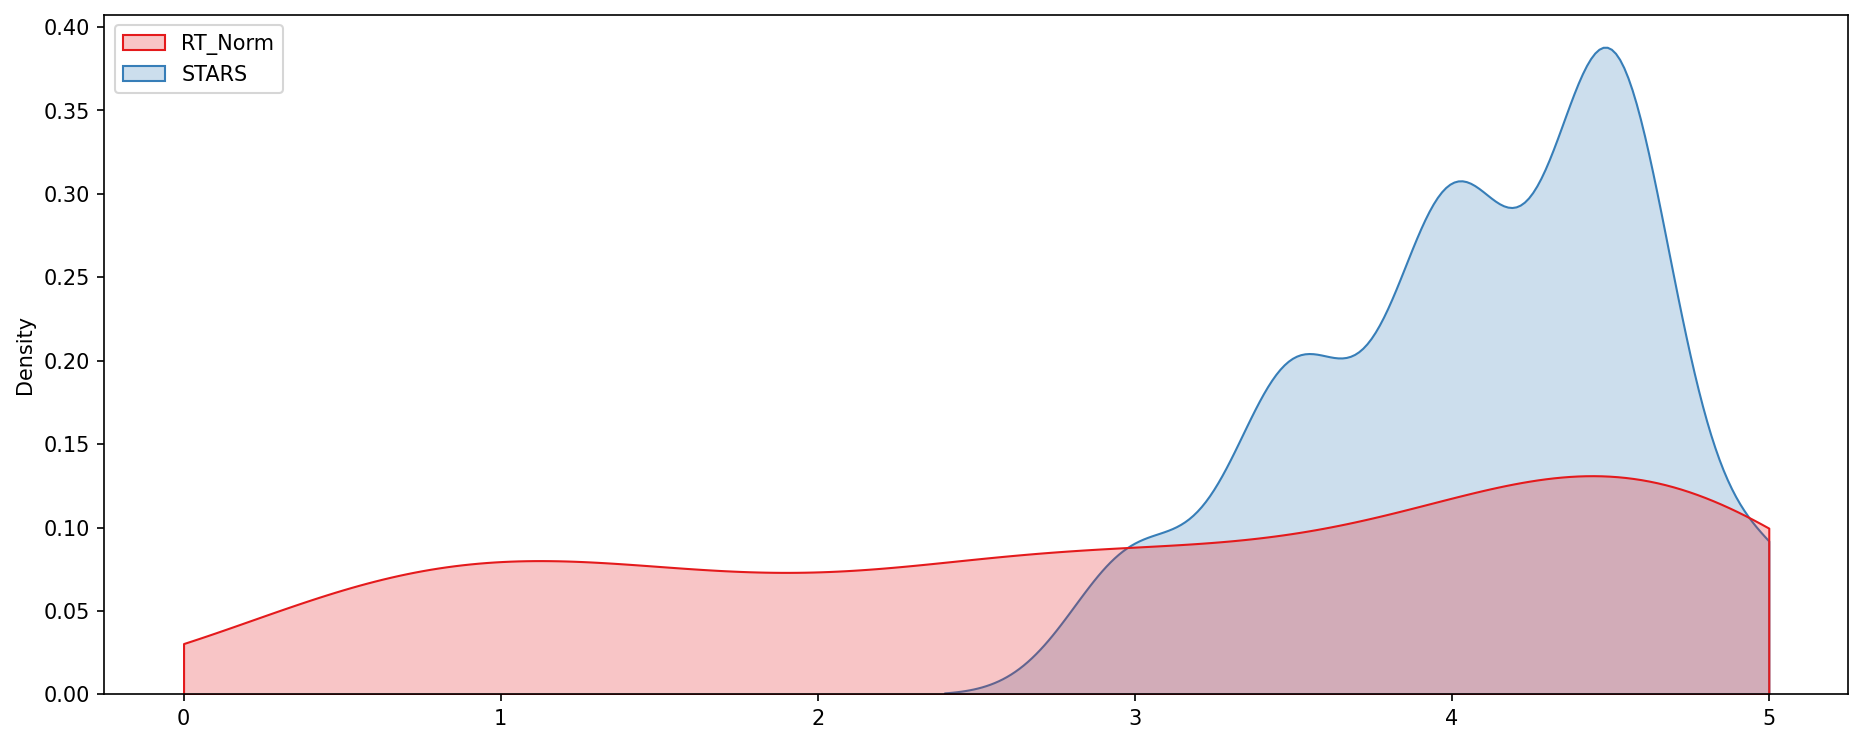

In [87]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=norm_scores[['RT_Norm','STARS']],clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")

- Special task : Creating a histplot comparing all normalized scores.

<AxesSubplot:ylabel='Count'>

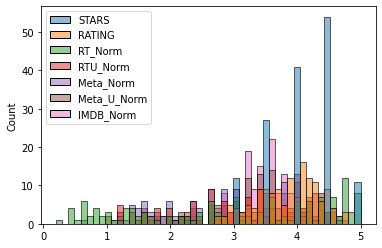

In [88]:
sns.histplot(norm_scores,bins=50)

## How are the worst movies rated across all platforms?
__TASK : create a clustermap visualizing all normalized scores.__

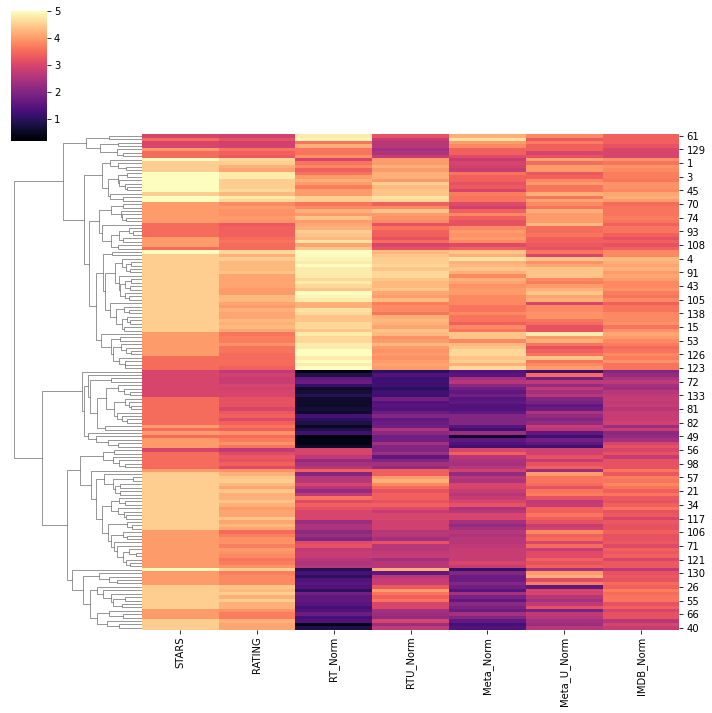

In [89]:
sns.clustermap(norm_scores,cmap='magma',col_cluster=False)

In [90]:
# Task 3 F -> Getting hands on 10 worst movies

In [91]:
norm_scores.columns

Index(['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm'],
      dtype='object')

In [92]:
norm_films = df[['FILM','STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm',
       'IMDB_Norm']]

In [93]:
worst_films = norm_films.nsmallest(10,'RT_Norm')

In [94]:
worst_films

,FILM,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


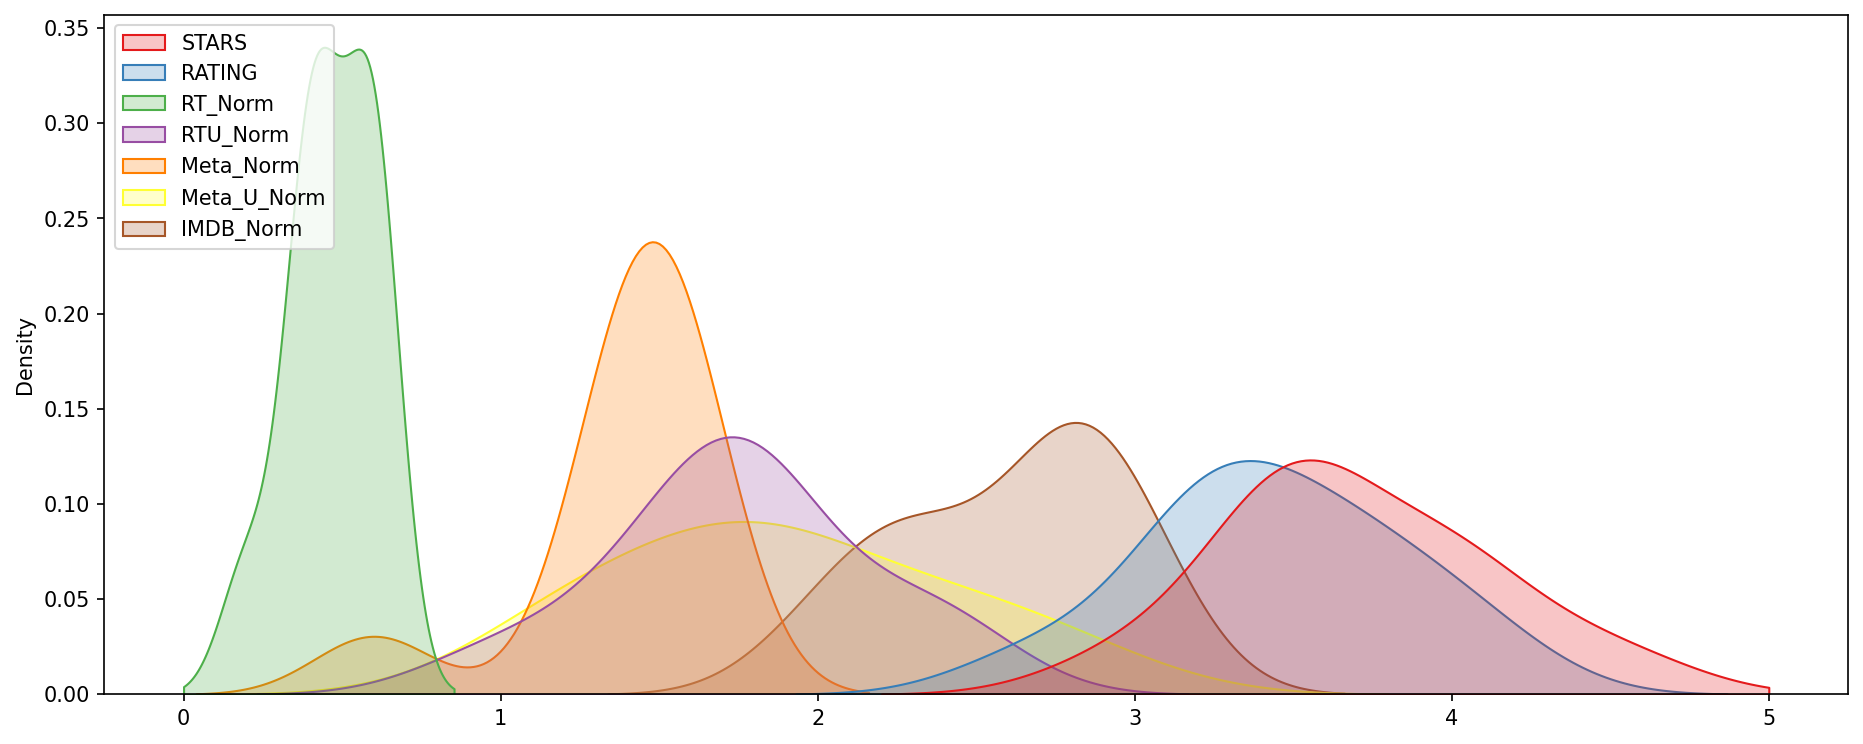

In [95]:
fig, ax = plt.subplots(figsize=(15,6),dpi=150)
sns.kdeplot(data=worst_films,clip=[0,5],shade=True,palette='Set1')
move_legend(ax, "upper left")